In [10]:
import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ast
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')


In [11]:
df_movies= pd.read_csv('./dataset_csv/movies_dataset.csv')


Relación entre el revenue total y la cantidad de peliculas que realizó cada Productora

In [15]:
# Cargar el DataFrame desde el archivo 'pq_prodCo.parquet'
df_prodCo = pd.read_parquet('datasets/pq_prodCo.parquet')

# Calcular la correlación entre las columnas
correlation = df_prodCo['total_revenue'].corr(df_prodCo['total_movies'])

# Realizar un análisis
if correlation > 0:
    analysis = "Existe una correlación positiva entre Total Revenue y Total Movies."
elif correlation < 0:
    analysis = "Existe una correlación negativa entre Total Revenue y Total Movies."
else:
    analysis = "No parece haber una correlación clara entre Total Revenue y Total Movies."


ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [28]:
correlation

0.9201509266818522

In [29]:

analysis

'Existe una correlación positiva entre Total Revenue y Total Movies.'

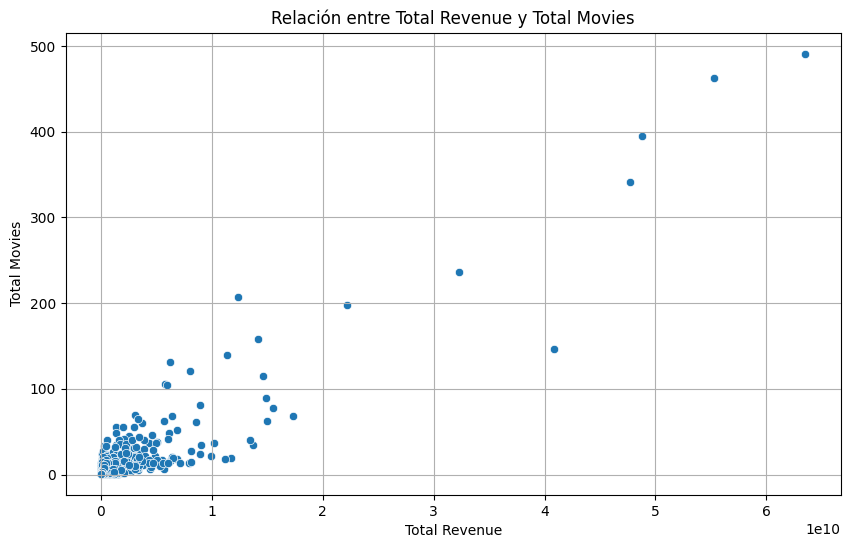

In [30]:
# Crear una gráfica de dispersión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='total_movies', data=df_prodCo)
plt.title('Relación entre Total Revenue y Total Movies')
plt.xlabel('Total Revenue')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [1]:
#Se guarda como un archivo PNG en la carpeta "images".
#plt.savefig('images/scatterplot_prod.png')
scatterplot_prod.to_file('images/scatterplot_prod.png')

NameError: name 'scatterplot_prod' is not defined

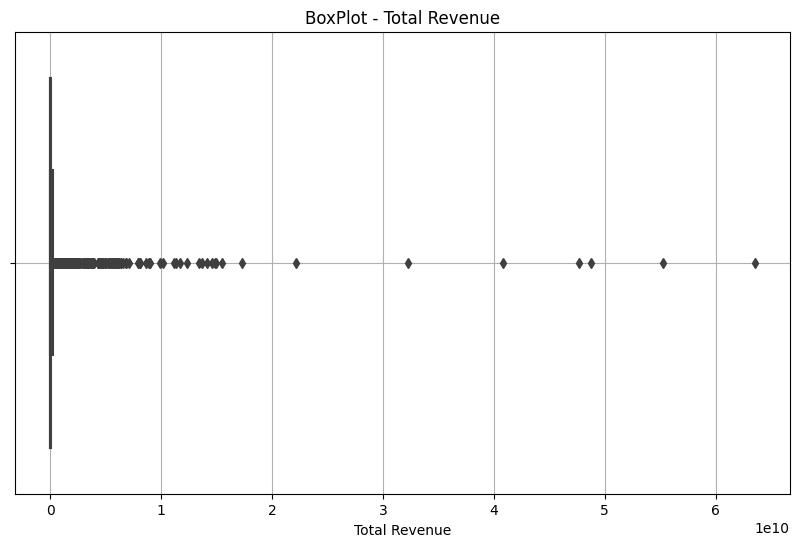

In [31]:
# Crear un boxplot para visualizar los datos y detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prodCo['total_revenue'])
plt.title('BoxPlot - Total Revenue')
plt.xlabel('Total Revenue')
plt.grid(True)
plt.show()

In [2]:
#Se guarda como un archivo PNG en la carpeta "images".
#plt.savefig('images/boxplot_prod.png')
boxplot_prod.to_file('images/boxplot_prod.png')

NameError: name 'boxplot_prod' is not defined

In [32]:
# Calcular los cuartiles
Q1 = df_prodCo['total_revenue'].quantile(0.25)
Q3 = df_prodCo['total_revenue'].quantile(0.75)

# Calcular el rango intercuartílico
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
df_no_outliers = df_prodCo[(df_prodCo['total_revenue'] >= lower_bound) & (df_prodCo['total_revenue'] <= upper_bound)]


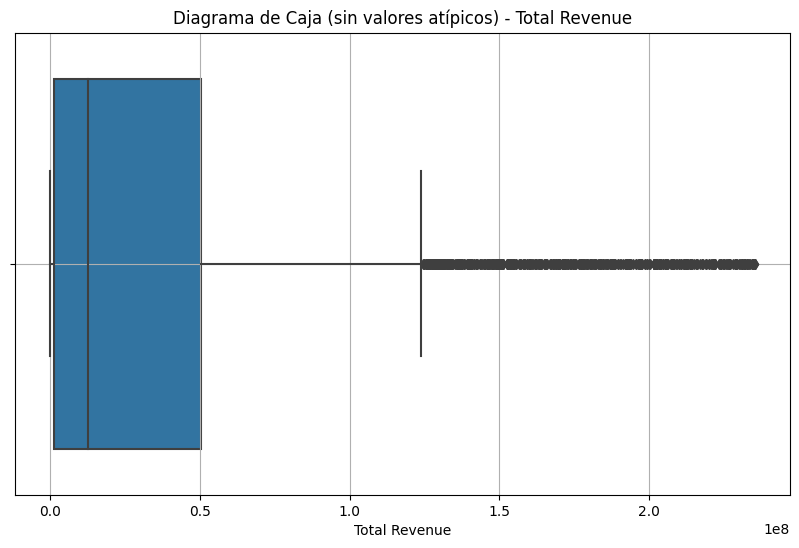

In [33]:
# Crear un nuevo boxplot para los datos sin valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['total_revenue'])
plt.title('Diagrama de Caja (sin valores atípicos) - Total Revenue')
plt.xlabel('Total Revenue')
plt.grid(True)
plt.show()

In [12]:
#Se guarda como un archivo PNG en la carpeta "images".
plt.savefig('images/boxplotNoOutliers_prod.png')

<Figure size 640x480 with 0 Axes>

In [34]:
# Calcular la correlación entre las columnas para los datos sin valores atípicos
correlation = df_no_outliers['total_revenue'].corr(df_no_outliers['total_movies'])

# Realizar un análisis
if correlation > 0:
    analysis = "Existe una correlación sin Outliers positiva entre Total Revenue y Total Movies."
elif correlation < 0:
    analysis = "Existe una correlación sin Outliers negativa entre Total Revenue y Total Movies."
else:
    analysis = "No parece haber una correlación clara entre Total Revenue y Total Movies."
    

In [35]:
correlation


0.35243957595081654

In [36]:
analysis

'Existe una correlación sin Outliers positiva entre Total Revenue y Total Movies.'

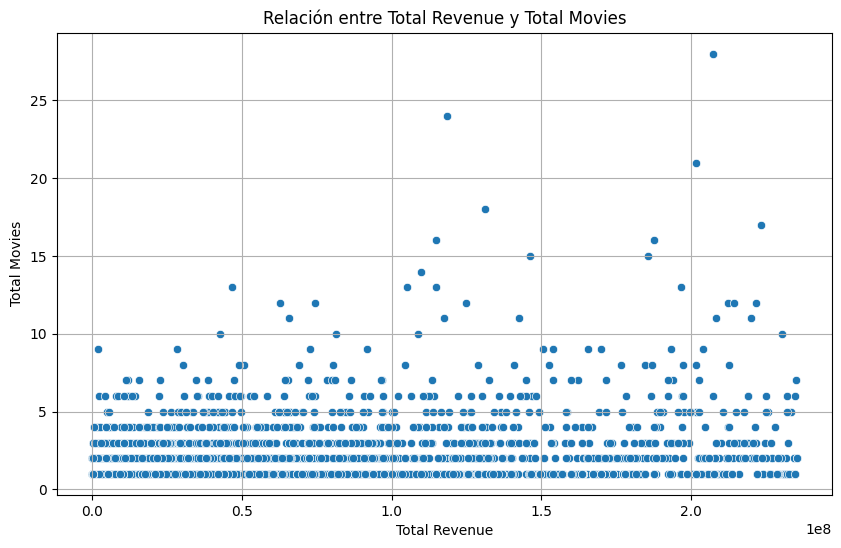

In [37]:
# Crear una gráfica de dispersión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='total_movies', data=df_no_outliers)
plt.title('Relación entre Total Revenue y Total Movies')
plt.xlabel('Total Revenue')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [ ]:
#Se guarda como un archivo PNG en la carpeta "images".
savefigscatterplotNoOutliers_prod.to_file('images/scatterplotNoOutliers_prod.png')

<Figure size 640x480 with 0 Axes>

En el análisis de datos con el df_prodCo completo, la correlación entre las dos variables es 0.9201509266818522. Esto indica una correlación positiva bastante fuerte entre las dos variables.

Cuando se elimina a los outliers del df_prodCo y se realiza nuevamente el análisis, la correlación disminuye significativamente a 0.35243957595081654. Esto sugiere que después de eliminar los outliers, la relación entre las dos variables se debilita considerablemente. Esto podría indicar que los outliers estaban influyendo en gran medida en la correlación observada en el análisis inicial.

Este analisis preliminar permite observar que puede haber un patrón interesante que valga la pena explorar en un análisis posterior como para por ejemplo evaluar performance de productoras en funcion de diferentes epocas con valores actualizados de revenue.

WordCloud

In [38]:
#Se pasan las columnas de object a str 
df_movies['title'] = df_movies['title'].astype('str')
df_movies['overview'] = df_movies['overview'].astype('str')


In [39]:
#Se unen los valores de las columnas en una sola cadena de texto
title_corpus = ' '.join(df_movies['title'])
overview_corpus = ' '.join(df_movies['overview'])

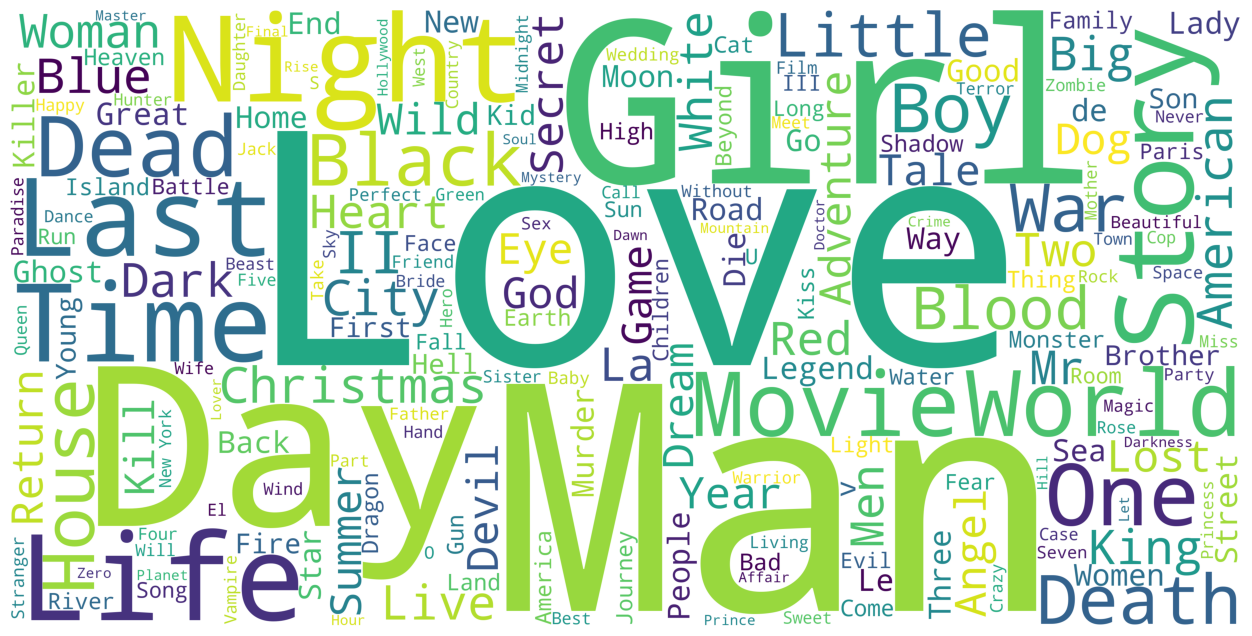

In [40]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [22]:
title_wordcloud.to_file('images/title_wordcloud.png')

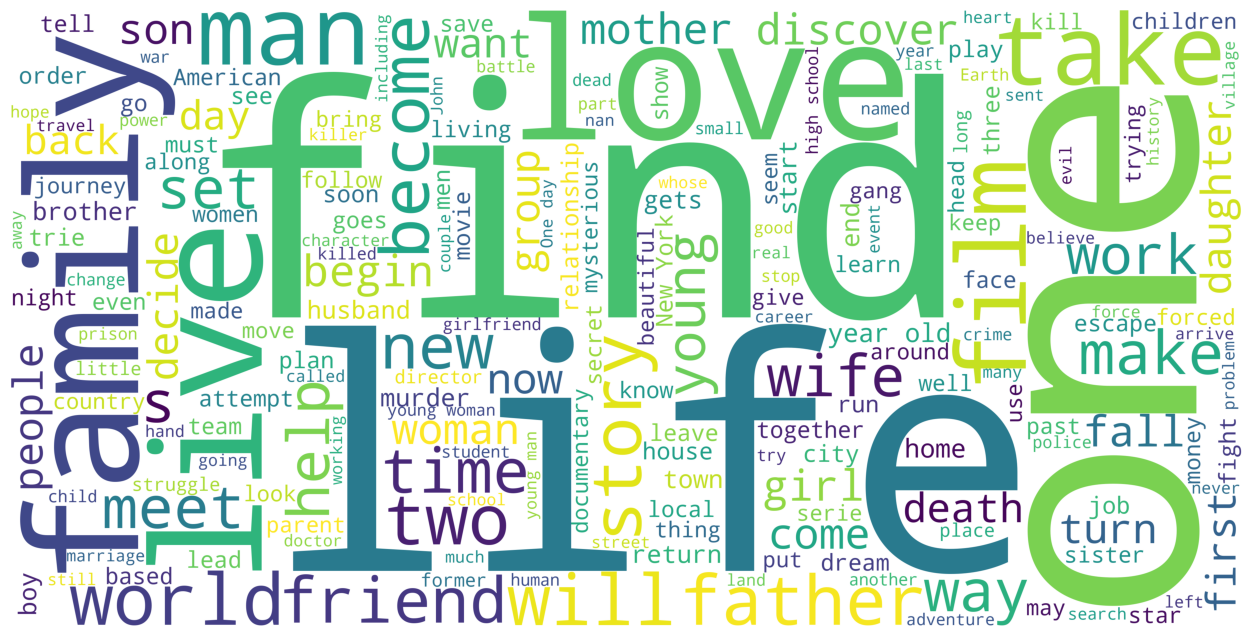

In [23]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [24]:
overview_wordcloud.to_file('images/overview_wordcloud.png')